In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from imblearn import over_sampling
from sklearn.ensemble import ExtraTreesClassifier
import sklearn.decomposition



In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

labels = train.columns.drop(['id', 'target'])
target = train['target']


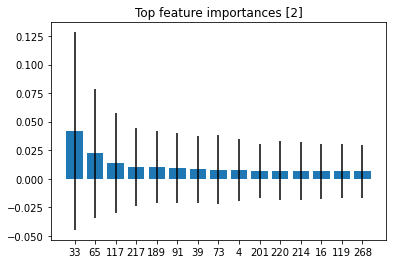

In [3]:

TOP_FEATURES = 15

forest = ExtraTreesClassifier(n_estimators=250, max_depth=5, random_state=1)
forest.fit(train[labels], train['target'])

importances = forest.feature_importances_
std = np.std(
    [tree.feature_importances_ for tree in forest.estimators_],
    axis=0
)
indices = np.argsort(importances)[::-1]
indices = indices[:TOP_FEATURES]

plt.figure()
plt.title('Top feature importances [2]')
plt.bar(
    range(TOP_FEATURES),
    importances[indices],
    yerr=std[indices],
)
plt.xticks(range(TOP_FEATURES), indices)
plt.show()


<AxesSubplot:title={'center':'Train data after Boarderline SMOTE'}, xlabel='0', ylabel='1'>

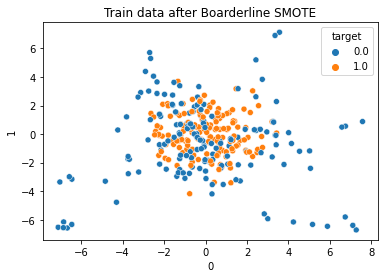

In [4]:
sm = over_sampling.BorderlineSMOTE(
    random_state=42, kind="borderline-1")

X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']
X_res, y_res = sm.fit_resample(X_train, y_train)


trainDF = pd.DataFrame(X_res)

dim_reduction = sklearn.decomposition.TruncatedSVD(n_components=2, random_state=34)
dim_reduced_result = pd.DataFrame(dim_reduction.fit_transform(X_res))


plt.title("Train data after Boarderline SMOTE")

sns.scatterplot(x=dim_reduced_result[0], y=dim_reduced_result[1], hue=y_res)
